In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install indic-nlp-library

In [ ]:
import pandas as pd
import re
import random
from indicnlp.tokenize import indic_tokenize

file_name = '/content/drive/MyDrive/Datasets_HateSpeech/Hindi/Hindi.csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_name, encoding='utf-8')
df.head()

,text,task_1,task_2
0,@rssurjewala #Hindus DYING #HindusLivesMatter ...,NOT,NONE
1,सब लोग इतने पैसे डोनेट ही कर रहे हैं फिर भी आम...,NOT,NONE
2,शेर-ए- सिवान शहाबुद्दीन साहब से रिश्ता क्या ل...,NOT,NONE
3,@AskAnshul आसमानी किताब के नाजायज औलाद है।,HOF,OFFN
4,@Shikha0222 इसे कहते हैं दोगला पंती जिस सपा की...,NOT,NONE


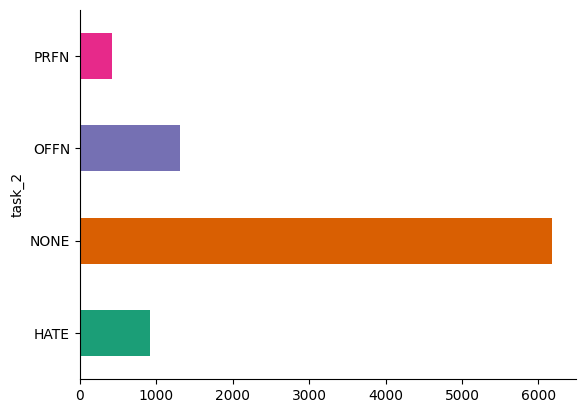

In [ ]:
# @title task_2

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('task_2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

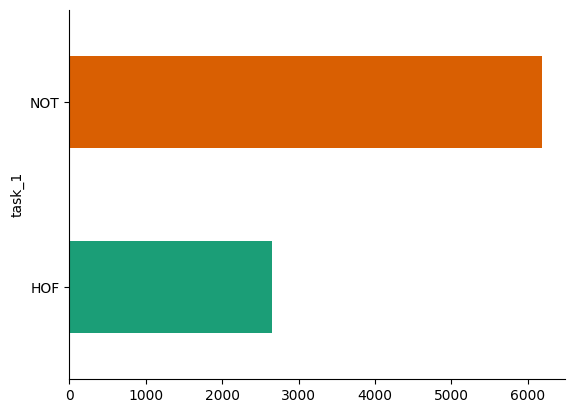

In [ ]:
# @title task_1

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('task_1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# # Remove rows with 'FAKE' label
# df = df[df['Labels Set'] != 'fake']

# #Print length of the dataset
# print("Length of the dataset: ", len(df))

In [ ]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found. Removing duplicates...")
    df.drop_duplicates(inplace=True)

# Check for NaN values
nan_rows = df[df.isna().any(axis=1)]
if not nan_rows.empty:
    print("Rows with NaN values found. Removing...")
    df.dropna(inplace=True)

# Print length of the dataset after removing duplicates and NaN values
print("Length of the dataset after cleaning: ", len(df))

Duplicate rows found. Removing duplicates...
Length of the dataset after cleaning:  8638


In [ ]:
df.head()

,text,task_1,task_2
0,@rssurjewala #Hindus DYING #HindusLivesMatter ...,NOT,NONE
1,सब लोग इतने पैसे डोनेट ही कर रहे हैं फिर भी आम...,NOT,NONE
2,शेर-ए- सिवान शहाबुद्दीन साहब से रिश्ता क्या ل...,NOT,NONE
3,@AskAnshul आसमानी किताब के नाजायज औलाद है।,HOF,OFFN
4,@Shikha0222 इसे कहते हैं दोगला पंती जिस सपा की...,NOT,NONE


In [ ]:
# import re

# def remove_emojis(text):
#     # Define a regular expression pattern to match emojis
#     emoji_pattern = re.compile("["
#                                u"\U0001F600-\U0001F64F"  # emoticons
#                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                                u"\U00002500-\U00002BEF"  # chinese char
#                                u"\U00002702-\U000027B0"
#                                u"\U00002702-\U000027B0"
#                                u"\U000024C2-\U0001F251"
#                                u"\U0001f926-\U0001f937"
#                                u"\U00010000-\U0010ffff"
#                                u"\u2640-\u2642"
#                                u"\u2600-\u2B55"
#                                u"\u200d"
#                                u"\u23cf"
#                                u"\u23e9"
#                                u"\u231a"
#                                u"\ufe0f"  # dingbats
#                                u"\u3030"
#                                "]+", flags=re.UNICODE)

#     # Remove emojis from the text using the pattern
#     return emoji_pattern.sub(r'', text)

In [ ]:
# Function to preprocess text
def preprocess_text(text):
    # Remove mentions, email addresses, URLs, RT (retweet)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove mentions
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)  # Remove email addresses
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'RT\s*@\S+', '', text)  # Remove retweets
    # Remove HTML tags (if any)
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation marks (comma and purnviram)
    text = re.sub(r'[\u002C\u0964]', '', text)
    # Remove special characters and accented characters
    text = re.sub(r'[^\u0900-\u097F\s]', '', text)
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # Strip leading/trailing whitespaces
    text = text.strip()
    return text

In [ ]:
preprocess_text('@rssurjewala #Hindus DYING #HindusLivesMatter   #KindAttnPMNarendraModi  #coronasecondwaveinindia #ModiMadeDisaster #ResignModi    #BJP #RSS LIARS   I WARNED 2 YRS BACK #RSSTerrorists BANNED BY SARDAR PATEL IGNORED  #शेर_नहीं_भेड़िया_पाल_लिया_भक्तो  #MautKaSaudagar')

'शेरनहींभेड़ियापाललियाभक्तो'

In [ ]:
# Preprocess the 'Post' column
df['Processed_Post'] = df['text'].apply(preprocess_text)
#df['Processed_Post'] = df['Post'].apply(remove_emojis)

df.head(10)

,text,task_1,task_2,Processed_Post
0,@rssurjewala #Hindus DYING #HindusLivesMatter ...,NOT,NONE,शेरनहींभेड़ियापाललियाभक्तो
1,सब लोग इतने पैसे डोनेट ही कर रहे हैं फिर भी आम...,NOT,NONE,सब लोग इतने पैसे डोनेट ही कर रहे हैं फिर भी आम...
2,शेर-ए- सिवान शहाबुद्दीन साहब से रिश्ता क्या ل...,NOT,NONE,शेरए सिवान शहाबुद्दीन साहब से रिश्ता क्या
3,@AskAnshul आसमानी किताब के नाजायज औलाद है।,HOF,OFFN,आसमानी किताब के नाजायज औलाद है
4,@Shikha0222 इसे कहते हैं दोगला पंती जिस सपा की...,NOT,NONE,इसे कहते हैं दोगला पंती जिस सपा की दम पर से का...
5,@Sandeep_News_24 बिहार की आम जनता को बहुत ही न...,HOF,HATE,बिहार की आम जनता को बहुत ही नाराजगी है केंद्र ...
6,यही तेरी असलियत है कि चोरी रोज करेगा खेत मे ले...,HOF,OFFN,यही तेरी असलियत है कि चोरी रोज करेगा खेत मे ले...
7,भोजपुरी का 2 टके का सिंगर किसी के लड़की का नाम...,HOF,HATE,भोजपुरी का टके का सिंगर किसी के लड़की का नाम ल...
8,#MuddaGaramHai चुनाव नतीजों के बाद बंगाल में ज...,NOT,NONE,चुनाव नतीजों के बाद बंगाल में जारी हिंसा अप्रत...
9,@anushka_s2 मूर्ख लड़की,HOF,OFFN,मूर्ख लड़की


## Code to save the files

In [ ]:
set(df["task_1"])

{'HOF', 'NOT'}

In [ ]:
mapping_dict = {'HOF': 1, 'NOT': 0}
df["task_1"] = df["task_1"].map(mapping_dict)

In [ ]:
train_hate_df = df[df["task_1"] == 1].copy()
train_non_hate_df = df[df["task_1"] == 0].copy()

sampled_hate_df = train_hate_df.sample(n=2500, random_state=42)
sampled_non_hate_df = train_non_hate_df.sample(n=2500, random_state=42)

train_sampled_hate_df = sampled_hate_df.iloc[:2000]
train_sampled_non_hate_df = sampled_non_hate_df.iloc[:2000]

train_concatenated_df = pd.concat([train_sampled_hate_df, train_sampled_non_hate_df], axis=0)
train_df = train_concatenated_df.sample(frac=1, random_state=42).reset_index(drop=True)

test_sampled_hate_df = sampled_hate_df.iloc[-500:]
test_sampled_non_hate_df = sampled_non_hate_df.iloc[-500:]

test_concatenated_df = pd.concat([test_sampled_hate_df, test_sampled_non_hate_df], axis=0)
test_df = test_concatenated_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
test_df[test_df['task_1'] == 1]

,text,task_1,task_2,Processed_Post
4,@ZeeNewsHindi रावण और उसकी भीम सेना का नकाब उ...,1,HATE,रावण और उसकी भीम सेना का नकाब उतर गया ये सिर्फ...
9,RT @RoflSinha: बादलों में रडार के सिगनल उलझ जा...,1,OFFN,बादलों में रडार के सिगनल उलझ जाते हैं मोदीजी ऐ...
11,ट्वीटर की औकात मेरे लिए सिर्फ 4 चवन्नी घोडे पे...,1,OFFN,ट्वीटर की औकात मेरे लिए सिर्फ चवन्नी घोडे पे ज...
16,@anushka_s2 मूर्ख लड़की,1,OFFN,मूर्ख लड़की
19,एक बात पुछनी है ....\nजब गाली देने का मन करे त...,1,PRFN,एक बात पुछनी है जब गाली देने का मन करे तो कांग...
...,...,...,...,...
994,इस धरा का जानवर रूपी मनुष्य से बदला लेना स्वाभ...,1,HATE,इस धरा का जानवर रूपी मनुष्य से बदला लेना स्वाभ...
995,RT @Mahadev09627571: सील मेरा तोड़ दिया उसने ब...,1,OFFN,सील मेरा तोड़ दिया उसने बुरा क्यु मनु उसको हक़...
996,RT @keshavyadaviyc: मेरा शुरू से कहना है कि अर...,1,OFFN,मेरा शुरू से कहना है कि अरविंद केजरीवाल और मोद...
998,RT @subbiah_doctor: आज के चुनाव में हिन्दू आतं...,1,HATE,आज के चुनाव में हिन्दू आतंकवाद बात करने वालों ...


In [ ]:
test_df['Labels Set'] = test_df['task_1']
train_df['Labels Set'] = train_df['task_1']

In [ ]:
# Define the new filename for saving the preprocessed data
train_file = file_name.split('.')[0] + '_train.csv'

# Save the preprocessed data to a new CSV file
train_df.to_csv(train_file, index=False, encoding='utf-8')

In [ ]:
# Define the new filename for saving the preprocessed data
test_file = file_name.split('.')[0] + '_test.csv'

# Save the preprocessed data to a new CSV file
test_df.to_csv(test_file, index=False, encoding='utf-8')